<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.


In [111]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"sadeghakbari\",\"key\":\"cc5ed3e2f4f1bb63ed4233176339a380\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [112]:
!kaggle datasets download -d camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


'y' then 'enter'

In [113]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: housing.csv             


# Library

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
from sklearn.preprocessing import StandardScaler
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline
sns.set(color_codes=True)

### import dataset as a data frame

In [115]:
housing_price = pd.read_csv('sample_data/california_housing_test.csv')

# About Dataset

A quick look at the dataset



In [116]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


# Data Cleaning

### Fortunately (or unfortunately?!) our dataset did not have **null** , **invalid** or **duplicate** values ​​to mess with.

#### Checking Nulls

In [117]:
housing_price.isnull().sum(axis = 0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [118]:
housing_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


#### Checking **Duplicates**

In [119]:
housing_price[housing_price.duplicated()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


# Feature Construction/Extraction

In [120]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


## Ratio


create some important ratio

In [121]:
housing_price['bedrooms_per_people'] = housing_price['total_rooms'] / housing_price['households']

In [122]:
housing_price['rooms_per_house'] = housing_price['total_bedrooms'] / housing_price['households']

In [123]:
housing_price['population_per_house'] = housing_price['population'] / housing_price['households']

In [124]:
housing_price['income_per_mean_households'] = housing_price['median_income'] * housing_price['population_per_house']

In [125]:
housing_price['bedroom_per_room'] = housing_price['total_bedrooms'] / housing_price['total_rooms']

In [126]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,rooms_per_house,population_per_house,income_per_mean_households,bedroom_per_room
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,1.090759,2.536304,16.761163,0.170142
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,1.119134,2.920578,10.511159,0.205298
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,1.024242,2.997980,17.368496,0.141265
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,1.363636,4.454545,27.332645,0.223881
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,1.029536,3.586498,10.535338,0.196616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,1.057661,2.072488,2.443463,0.442759
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,1.044402,3.374517,11.441639,0.205821
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,0.913636,3.150000,7.211925,0.210251
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,1.000000,3.285714,10.746914,0.145833


## Combining Columns

create some important columns

In [127]:
housing_price['mean_free_room_in_house'] = housing_price['population_per_house'] - housing_price['rooms_per_house']

In [128]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,rooms_per_house,population_per_house,income_per_mean_households,bedroom_per_room,mean_free_room_in_house
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,1.090759,2.536304,16.761163,0.170142,1.445545
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,1.119134,2.920578,10.511159,0.205298,1.801444
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,1.024242,2.997980,17.368496,0.141265,1.973737
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,1.363636,4.454545,27.332645,0.223881,3.090909
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,1.029536,3.586498,10.535338,0.196616,2.556962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,1.057661,2.072488,2.443463,0.442759,1.014827
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,1.044402,3.374517,11.441639,0.205821,2.330116
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,0.913636,3.150000,7.211925,0.210251,2.236364
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,1.000000,3.285714,10.746914,0.145833,2.285714


### this use later in the count secion

we make some binary feature and count their 1 value

In [129]:
households_free_rooms_mean = housing_price['mean_free_room_in_house'].mean()

## Binning

In [130]:
bins = [-1,0, 1, 2, 3, 4, 5, 6]
labels = [-1,0,1,2,3,4,5]
housing_price['mean_free_room_in_house'] = pd.cut(housing_price['mean_free_room_in_house'], bins=bins, labels=labels)

In [131]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,rooms_per_house,population_per_house,income_per_mean_households,bedroom_per_room,mean_free_room_in_house
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,1.090759,2.536304,16.761163,0.170142,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,1.119134,2.920578,10.511159,0.205298,1
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,1.024242,2.997980,17.368496,0.141265,1
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,1.363636,4.454545,27.332645,0.223881,3
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,1.029536,3.586498,10.535338,0.196616,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,1.057661,2.072488,2.443463,0.442759,1
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,1.044402,3.374517,11.441639,0.205821,2
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,0.913636,3.150000,7.211925,0.210251,2
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,1.000000,3.285714,10.746914,0.145833,2


## count

we continue what we do in Combining Columns section

In [132]:
housing_price['have_free_rooms'] = (housing_price['mean_free_room_in_house'].astype(float) > households_free_rooms_mean).astype(int)

In [133]:
mean_household_income = housing_price['income_per_mean_households'].mean()
housing_price['more_that_avg_income'] = (housing_price['mean_free_room_in_house'].astype(float) > households_free_rooms_mean).astype(int)

now we make richness column

In [134]:
housing_price['richness'] = housing_price[['have_free_rooms','more_that_avg_income']].sum(axis=1).astype(int)

In [135]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,rooms_per_house,population_per_house,income_per_mean_households,bedroom_per_room,mean_free_room_in_house,have_free_rooms,more_that_avg_income,richness
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,1.090759,2.536304,16.761163,0.170142,1,0,0,0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,1.119134,2.920578,10.511159,0.205298,1,0,0,0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,1.024242,2.997980,17.368496,0.141265,1,0,0,0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,1.363636,4.454545,27.332645,0.223881,3,1,1,2
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,1.029536,3.586498,10.535338,0.196616,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,1.057661,2.072488,2.443463,0.442759,1,0,0,0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,1.044402,3.374517,11.441639,0.205821,2,1,1,2
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,0.913636,3.150000,7.211925,0.210251,2,1,1,2
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,1.000000,3.285714,10.746914,0.145833,2,1,1,2


## Aggregation

In [136]:
housing_price['Avg_Income_household_Group'] = housing_price['income_per_mean_households'].groupby(housing_price['mean_free_room_in_house']).transform('mean')

In [137]:
housing_price['Avg_Income_household_Group_ratio'] = housing_price['income_per_mean_households']/housing_price['Avg_Income_household_Group']

In [138]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,rooms_per_house,population_per_house,income_per_mean_households,bedroom_per_room,mean_free_room_in_house,have_free_rooms,more_that_avg_income,richness,Avg_Income_household_Group,Avg_Income_household_Group_ratio
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,1.090759,2.536304,16.761163,0.170142,1,0,0,0,10.674522,1.570203
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,1.119134,2.920578,10.511159,0.205298,1,0,0,0,10.674522,0.984696
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,1.024242,2.997980,17.368496,0.141265,1,0,0,0,10.674522,1.627098
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,1.363636,4.454545,27.332645,0.223881,3,1,1,2,12.270891,2.227438
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,1.029536,3.586498,10.535338,0.196616,2,1,1,2,13.167446,0.800105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,1.057661,2.072488,2.443463,0.442759,1,0,0,0,10.674522,0.228906
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,1.044402,3.374517,11.441639,0.205821,2,1,1,2,13.167446,0.868934
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,0.913636,3.150000,7.211925,0.210251,2,1,1,2,13.167446,0.547709
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,1.000000,3.285714,10.746914,0.145833,2,1,1,2,13.167446,0.816173


# date/time

date and time have no meaning in our dataset instead we make logarithym of price feature that can benefit prediction models

In [139]:
housing_price['log_income_per_mean_households'] = np.log(housing_price['income_per_mean_households'])

In [140]:
housing_price

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_people,...,population_per_house,income_per_mean_households,bedroom_per_room,mean_free_room_in_house,have_free_rooms,more_that_avg_income,richness,Avg_Income_household_Group,Avg_Income_household_Group_ratio,log_income_per_mean_households
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891,...,2.536304,16.761163,0.170142,1,0,0,0,10.674522,1.570203,2.819064
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264,...,2.920578,10.511159,0.205298,1,0,0,0,10.674522,0.984696,2.352437
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505,...,2.997980,17.368496,0.141265,1,0,0,0,10.674522,1.627098,2.854658
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909,...,4.454545,27.332645,0.223881,3,1,1,2,12.270891,2.227438,3.308082
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287,...,3.586498,10.535338,0.196616,2,1,1,2,13.167446,0.800105,2.354735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797,...,2.072488,2.443463,0.442759,1,0,0,0,10.674522,0.228906,0.893416
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324,...,3.374517,11.441639,0.205821,2,1,1,2,13.167446,0.868934,2.437259
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455,...,3.150000,7.211925,0.210251,2,1,1,2,13.167446,0.547709,1.975736
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143,...,3.285714,10.746914,0.145833,2,1,1,2,13.167446,0.816173,2.374619


# Feature Selection

## Mutual Information

we use mutual information to capture any relations between our features and the target

In [141]:
target_column = housing_price.pop("median_house_value")

In [142]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy="mean")

# Fit the imputer to the data
imputer.fit(housing_price)

# Transform the data using the imputer
housing_price_df = imputer.transform(housing_price)

feature_selector = SelectKBest(score_func=mutual_info_regression).fit(housing_price_df,target_column)

<Axes: ylabel='Feature'>

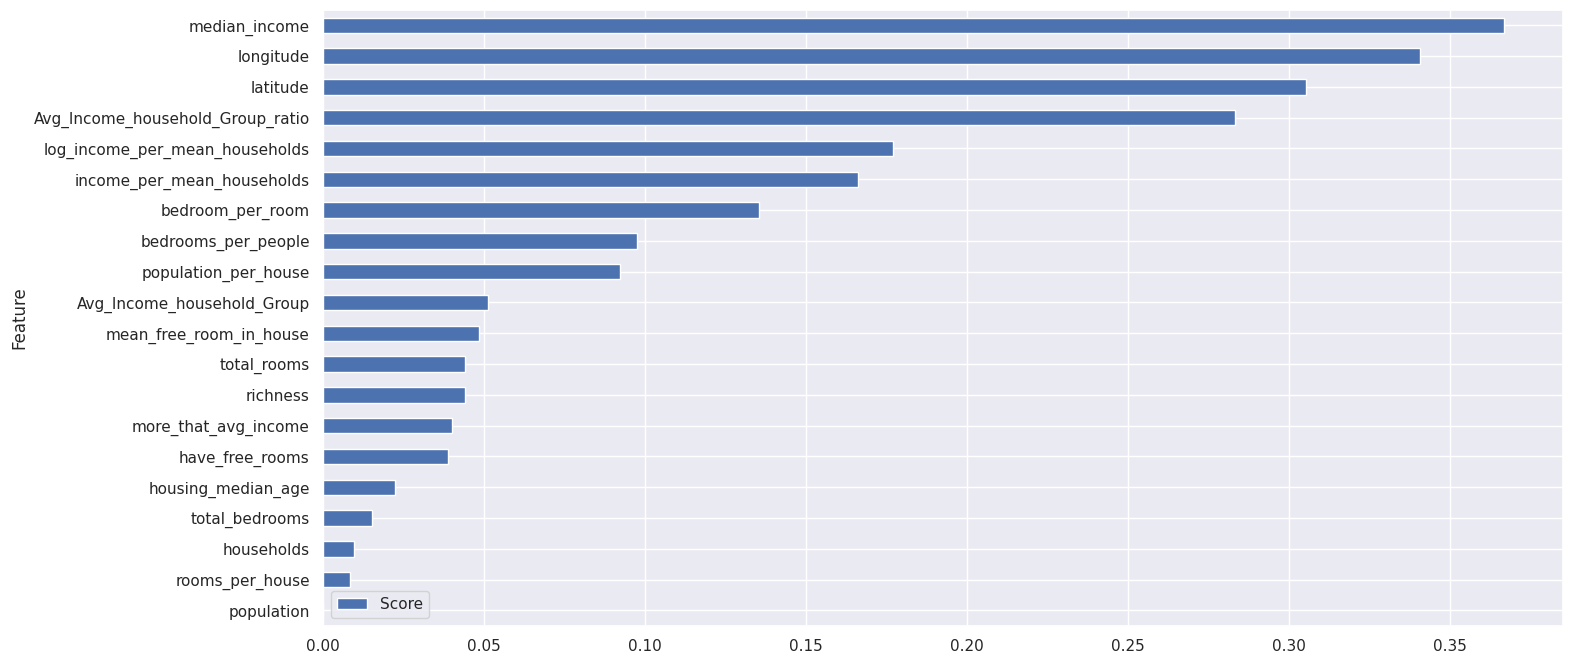

In [143]:
feature_scores = pd.DataFrame({'Feature':housing_price.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores.plot(x='Feature',y='Score',kind='barh',figsize=(16,8))

## Principal Component Analysis

First, let's normalize our data, as PCA is usually applied to normalized data.

In [144]:
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(housing_price)

In [145]:
normalized_df

array([[-1.23372874,  0.81463305, -0.14699983, ..., -0.1765684 ,
         1.14590062,  1.01362062],
       [ 0.64634391, -0.64593087,  1.12756514, ..., -0.1765684 ,
        -0.0307555 ,  0.14133019],
       [ 0.89200673, -0.87135553, -0.14699983, ..., -0.1765684 ,
         1.2602402 ,  1.0801575 ],
       ...,
       [-0.05554988,  0.31212392, -1.5012251 , ...,  0.98240612,
        -0.90894144, -0.5628578 ],
       [ 1.2379401 , -0.72107242,  0.88858421, ...,  0.98240612,
        -0.36942551,  0.18279473],
       [-0.02045519, -0.57078932,  1.04790483, ..., -0.1765684 ,
         2.65808757,  1.74549606]])

In [146]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy="mean")

# Fit the imputer to the data
imputer.fit(normalized_df)

# Transform the data using the imputer
normalized_df = imputer.transform(normalized_df)

In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(normalized_df)
df_pca = pd.DataFrame(data = normalized_df)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.233729,0.814633,-0.147000,0.596418,0.315337,0.130246,0.317734,1.510745,0.441088,-0.017288,-0.117123,0.196232,-0.747222,-0.400284,-0.763619,-0.763619,-0.763619,-0.176568,1.145901,1.013621
1,0.646344,-0.645931,1.127565,-0.505550,-0.529255,-0.576296,-0.582743,-0.112324,0.019633,0.048812,-0.026922,-0.041412,-0.153717,-0.400284,-0.763619,-0.763619,-0.763619,-0.176568,-0.030755,0.141330
2,0.892007,-0.871356,-0.147000,0.459078,-0.055225,0.078808,0.013926,1.071149,0.809835,-0.172242,-0.008753,0.219324,-1.234711,-0.400284,-0.763619,-0.763619,-0.763619,-0.176568,1.260240,1.080158
3,0.616263,-0.852570,-0.067340,-1.175083,-1.239098,-1.313894,-1.310788,1.255865,0.300557,0.618393,0.333149,0.598190,0.159991,1.956285,1.309554,1.309554,1.309554,0.565593,2.466705,1.927766
4,-0.040509,0.326213,-0.784282,-0.630362,-0.688068,-0.536504,-0.692223,-0.469081,-0.074782,-0.159911,0.129391,-0.040493,-0.300291,0.778000,1.309554,1.309554,1.309554,0.982406,-0.401717,0.145625


Now that we have all the components, we can check how many components to keep, based on the amount of "details" the components provide us with about the data:

Text(0.5, 1.0, ' ')

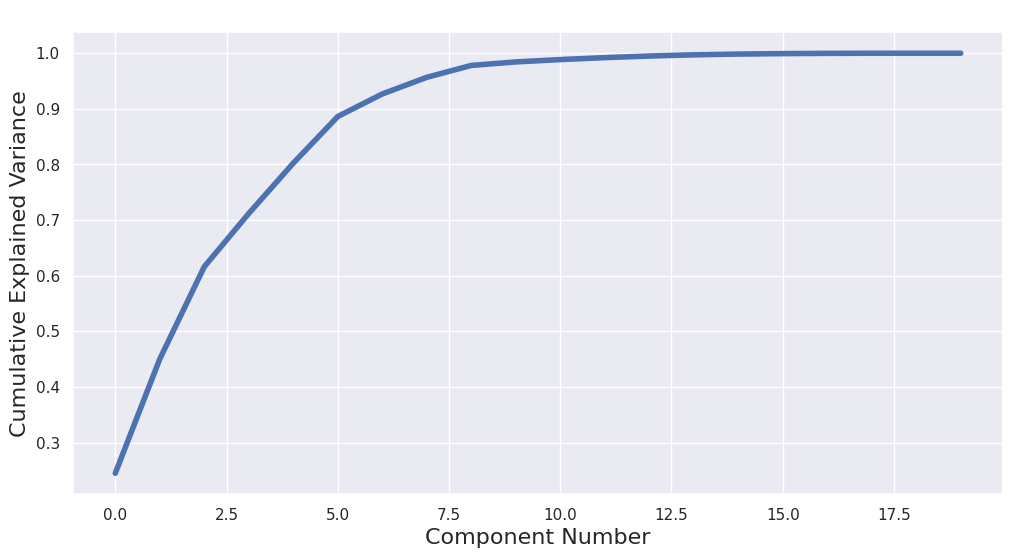

In [148]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)
plt.xlabel('Component Number',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title(' ')

8 is good option!

# question

## when is feature engineering a “nice to have option” and in what situations it is a “must to have”?

Feature engineering is the process of creating new features from existing data or transforming existing features to make them more suitable for modeling. It is an important part of machine learning, but it is not always necessary.

Here are some situations where feature engineering is a nice to have option:

    Strong baseline models
    High-quality datasets
    Deep learning models
    Time constraints

Here are some situations where feature engineering is a must have:

    Poor model performance
    Complex datasets
    Domain-specific problems
    Traditional machine learning models
    Interpretability is key
    Competitive scenarios
    Small datasets
In general, feature engineering is more important for traditional machine learning models and small datasets. It is also more important for problems where domain knowledge is available and interpretability is key.